In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from neupy.algorithms.rbfn.pnn import PNN
from neupy.algorithms.rbfn.grnn import GRNN
import warnings
warnings.filterwarnings("ignore")

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
!python --version

Python 3.8.8


In [3]:
# Создание элипса
def generate_points(a: float, b: float, x0: float, y0: float):
    t = np.arange(0, 2*np.pi, 0.025)
    points = np.zeros((t.shape[0], 2))
    points[:, 0] = a * np.cos(t) + x0
    points[:, 1] = b * np.sin(t) + y0
    return points

In [4]:
# Классификация области
def classify_square3(model_func, a1=-1.2, b1=1.2, a2=-1.2, b2=1.2, step=0.025):
    X_paint = np.array([[a1, a2]]).reshape((1, 2))
    for i in np.arange(a1, b1, step):
        for j in np.arange(a2, b2, step):
            X_paint = np.append(X_paint, np.array([[i, j]]), axis=0)
    Y_paint = model_func(X_paint)
    x1 = X_paint[(Y_paint == 0)]
    x2 = X_paint[(Y_paint == 1)]
    x3 = X_paint[(Y_paint == 2)]
    plt.figure(figsize=(8, 6))
    plt.scatter(x1.T[0], x1.T[1], marker='s', color='#03c2fc')
    plt.scatter(x2.T[0], x2.T[1], marker='s', color='#fcb103')
    plt.scatter(x3.T[0], x3.T[1], marker='s', color='#03fc6f')
    plt.title("Классификация заданной области на 3 класса")

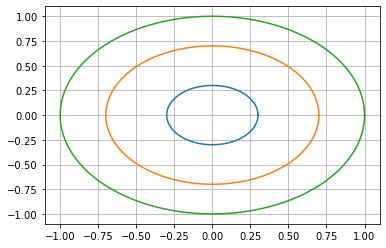

In [5]:
# Создание выборки
points1 = generate_points(0.3, 0.3, 0, 0)
points2 = generate_points(0.7, 0.7, 0, 0)
points3 = generate_points(1, 1, 0, 0)
plt.plot(points1[:, 0], points1[:, 1])
plt.plot(points2[:, 0], points2[:, 1])
plt.plot(points3[:, 0], points3[:, 1])
plt.grid(True)
plt.show()

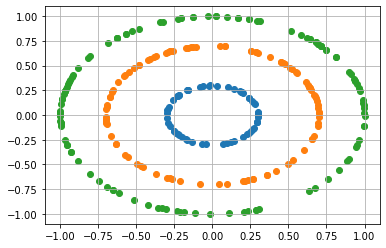

In [6]:
# Подготовка множеств 
points1 = points1[np.random.choice(points1.shape[0], 60),:]
points2 = points2[np.random.choice(points2.shape[0], 100),:]
points3 = points3[np.random.choice(points3.shape[0], 120),:]

plt.scatter(points1[:, 0], points1[:, 1])
plt.scatter(points2[:, 0], points2[:, 1])
plt.scatter(points3[:, 0], points3[:, 1])
plt.grid(True)
plt.show()

In [7]:
features = np.concatenate((points1, points2, points3))
labels = np.concatenate((np.full(60, 0), np.full(100, 1), np.full(120, 2)))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=23)
print(x_train.shape[0] / 280, x_test.shape[0] / 280)

0.8 0.2


In [9]:
# Обучение с параметром std=0.1
pnn = PNN(std=0.1)
pnn.fit(x_train, y_train)

PNN(batch_size=128, verbose=False, step=0.1, show_epoch=1, shuffle_data=False, epoch_end_signal=None, train_end_signal=None, std=0.1)

In [10]:
# Точность на обучающей выборке
accuracy_score(pnn.predict(x_train), y_train)

1.0

In [11]:
# Точность на тестовой выборке
accuracy_score(pnn.predict(x_test), y_test)

1.0

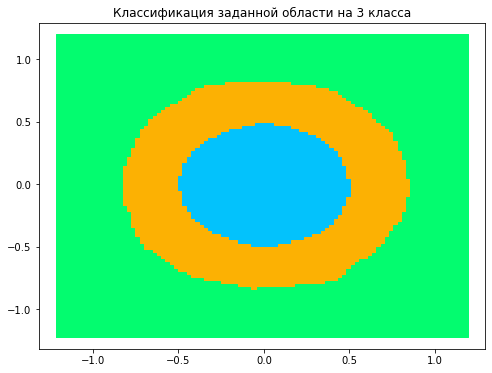

In [12]:
# Классификация областей
classify_square3(pnn.predict)

In [13]:
# Обучение с параметром std=0.3
pnn = PNN(std=0.3)
pnn.fit(x_train, y_train)

PNN(batch_size=128, verbose=False, step=0.1, show_epoch=1, shuffle_data=False, epoch_end_signal=None, train_end_signal=None, std=0.3)

In [14]:
# Точностьность на обучающей выборке
accuracy_score(pnn.predict(x_train), y_train)

1.0

In [15]:
# Точность на тестовой выборке
accuracy_score(pnn.predict(x_test), y_test)

1.0

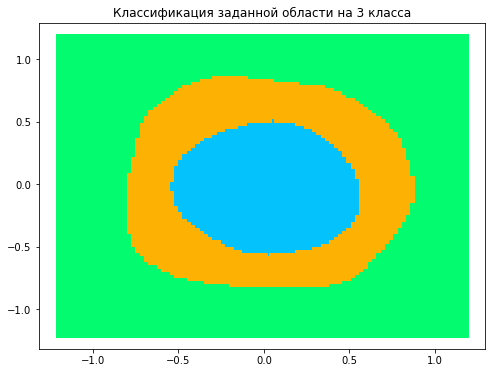

In [16]:
# Классификация области
classify_square3(pnn.predict)

###### Обе модели идеально классифицировали обучающее множества. 
###### Но модель с параметром std=0.1 более ровные границы множеств чем модель с параметром std=0.3

In [17]:
# Модель с параметром гамма = 0.3
svc = SVC(kernel='rbf', C=1e2, gamma=0.3)
svc.fit(x_train, y_train)

SVC(C=100.0, gamma=0.3)

In [18]:
# Точность на обучающей выборке
accuracy_score(svc.predict(x_train), y_train)

1.0

In [19]:
# Точность на тестовой выборке
accuracy_score(svc.predict(x_test), y_test)

1.0

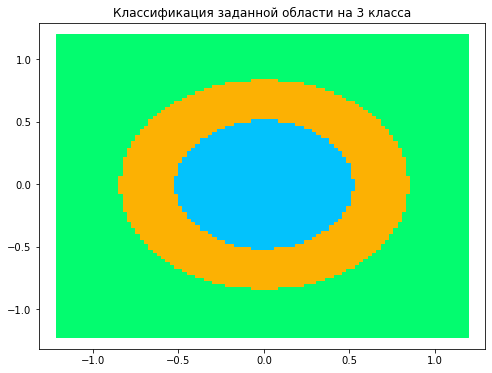

In [20]:
# Классификация области
classify_square3(svc.predict)

In [21]:
# Модель с параметром гамма = 0.1
svc = SVC(kernel='rbf', C=1e2, gamma=0.1)
svc.fit(x_train, y_train)

SVC(C=100.0, gamma=0.1)

In [22]:
# Точность на обучающем множестве
accuracy_score(svc.predict(x_train), y_train)

1.0

In [23]:
# Точность на тестовой выборке
accuracy_score(svc.predict(x_test), y_test)

1.0

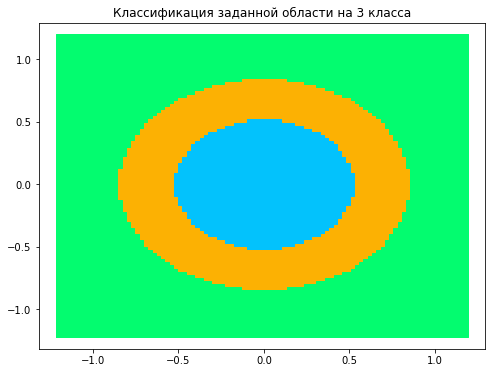

In [24]:
# Классификация области 
classify_square3(svc.predict)

###### Обе модели идеально классифицировали обучающее множества. 
###### Также обе модели верно классифицировали области. 

200


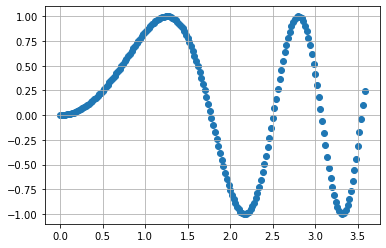

In [25]:
# Выборка
xt = lambda t: np.sin(t*t)
features = np.arange(0, 4, 0.02)
print(features.shape[0])
targets = xt(features)
n = int(0.9 * features.shape[0])
x_train, y_train = features[:n], targets[:n]
x_test, y_test = features[n:], targets[n:]
plt.scatter(x_train, y_train)
plt.grid(True)
plt.show()

In [26]:
#Создание модели
grnn = GRNN(std=0.1)
grnn.fit(x_train, y_train)

GRNN(verbose=False, step=None, show_epoch=None, shuffle_data=None, epoch_end_signal=None, train_end_signal=None, std=0.1)

In [27]:
# MAE на обучающей выборке
mean_squared_error(y_train, grnn.predict(x_train))

0.00264546652656753

In [28]:
# MAE на тестовой выборке
mean_squared_error(y_test, grnn.predict(x_test))

0.3811834261073895

In [29]:
# Предсказание на тесте и на трейне
train_predictions = grnn.predict(x_train)
test_predictions = grnn.predict(x_test)

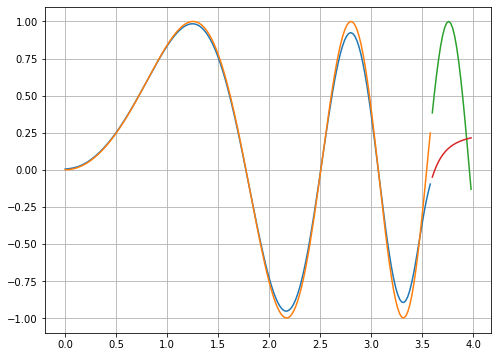

In [30]:
# Рисунок истинных и предсказанных значений на тестовой и обучающей выборке
plt.figure(figsize=(8, 6))
plt.plot(x_train, train_predictions)
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, test_predictions)
plt.grid(True)
plt.show()